[参考](https://nbviewer.jupyter.org/gist/whbzju/ff06fce9fd738dcf8096)。

In [23]:
import numpy as np
import pandas as pd

%matplotlib inline

In [24]:
df_origin = pd.read_csv("../input/train.csv", parse_dates=[0])
df_test = pd.read_csv('../input/test.csv', parse_dates=[0])

df_origin.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [25]:
df_origin.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [26]:
df_origin.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [27]:
df_origin.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [28]:
df_origin.columns.values

array(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype=object)

In [50]:
df_origin['hour'] = df_origin['datetime'].map(lambda x: x.hour)
df_origin['year'] = df_origin['datetime'].map(lambda x: x.year)
df_origin['month'] = df_origin['datetime'].map(lambda x: x.month)
df_origin['week'] = df_origin['datetime'].map(lambda x: x.weekday())

In [52]:
df_clean = df_origin[[
    'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity',
    'windspeed', 'casual', 'registered', 'count', 'hour', 'week', 'year',
    'month'
]]
df_clean.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,week,year,month
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,5,2011,1
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5,2011,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,5,2011,1
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,5,2011,1
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,5,2011,1


In [53]:
df_test['hour'] = df_test['datetime'].map(lambda x: x.hour)
df_test['year'] = df_test['datetime'].map(lambda x: x.year)
df_test['month'] = df_test['datetime'].map(lambda x: x.month)
df_test['week'] = df_test['datetime'].map(lambda x: x.weekday())

In [54]:
df_clean_test = df_test.drop('datetime', axis=1)
df_clean_test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,year,month,week
0,1,0,1,1,10.66,11.365,56,26.0027,0,2011,1,3
1,1,0,1,1,10.66,13.635,56,0.0000,1,2011,1,3
2,1,0,1,1,10.66,13.635,56,0.0000,2,2011,1,3
3,1,0,1,1,10.66,12.880,56,11.0014,3,2011,1,3
4,1,0,1,1,10.66,12.880,56,11.0014,4,2011,1,3


In [61]:
import numpy as np

df_clean['log_cas1'] = np.log(df_origin['casual'] + 1)
df_clean['log_reg1'] = np.log(df_origin['registered'] + 1)

In [64]:
df_clean['log_cas'] = np.log1p(df_origin['casual'])
df_clean['log_reg'] = np.log1p(df_origin['registered'])

In [66]:
df_clean[['log_cas', 'log_cas1', 'log_reg', 'log_reg1']]

,log_cas,log_cas1,log_reg,log_reg1
0,1.386294,1.386294,2.639057,2.639057
1,2.197225,2.197225,3.496508,3.496508
2,1.791759,1.791759,3.332205,3.332205
3,1.386294,1.386294,2.397895,2.397895
4,0.000000,0.000000,0.693147,0.693147
5,0.000000,0.000000,0.693147,0.693147
6,1.098612,1.098612,0.000000,0.000000
7,0.693147,0.693147,1.098612,1.098612
8,0.693147,0.693147,2.079442,2.079442
9,2.197225,2.197225,1.945910,1.945910


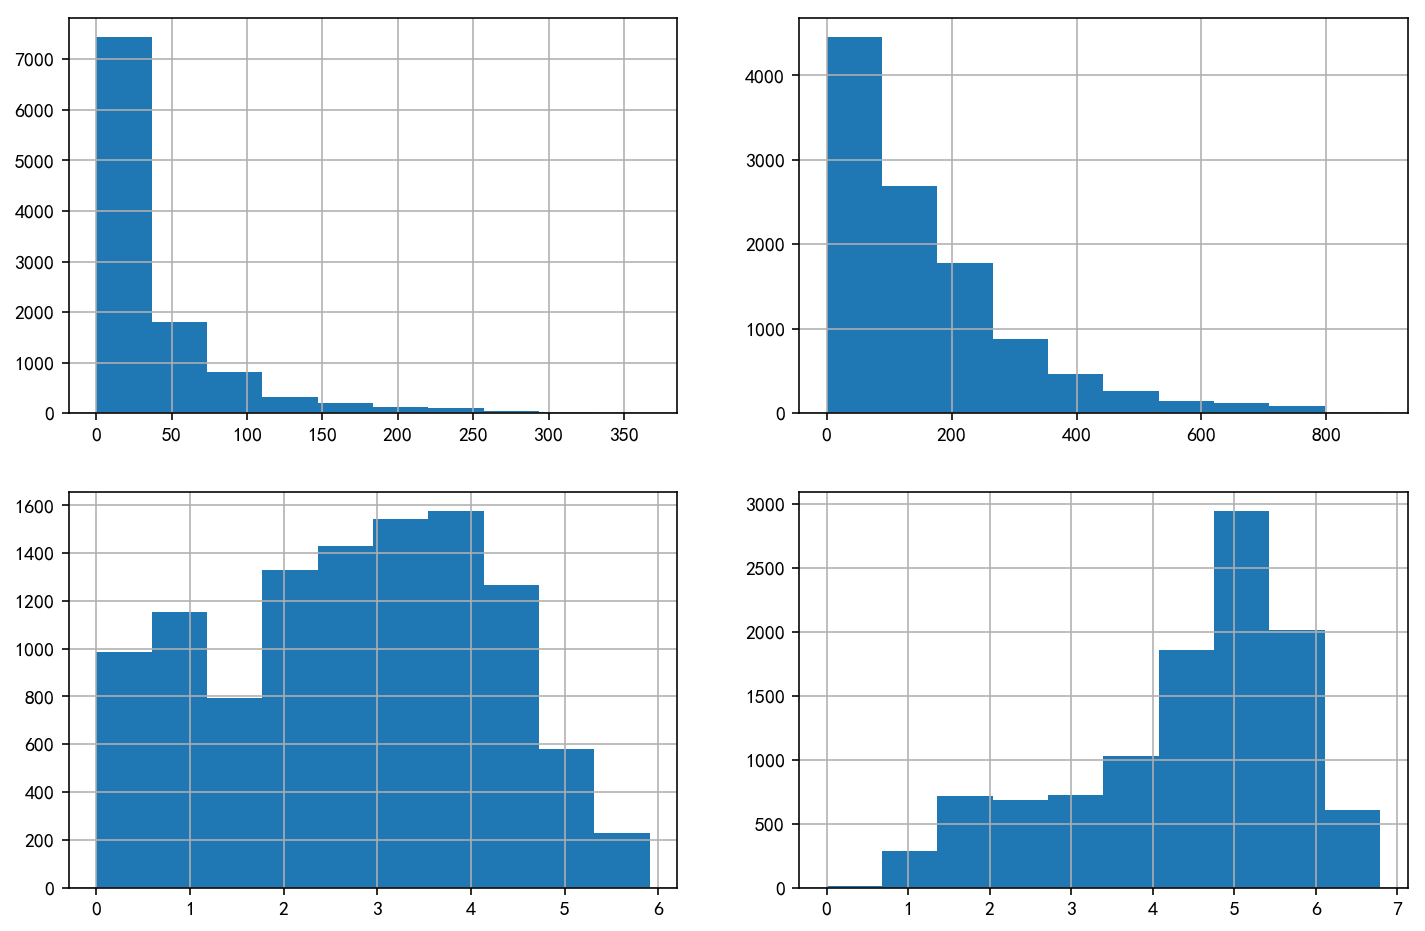

In [87]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(12, 8)
df_clean['casual'].hist(ax=axes[0][0])
df_clean['registered'].hist(ax=axes[0][1])
df_clean['log_cas'].hist(ax=axes[1][0])
df_clean['log_reg'].hist(ax=axes[1][1])
plt.show()

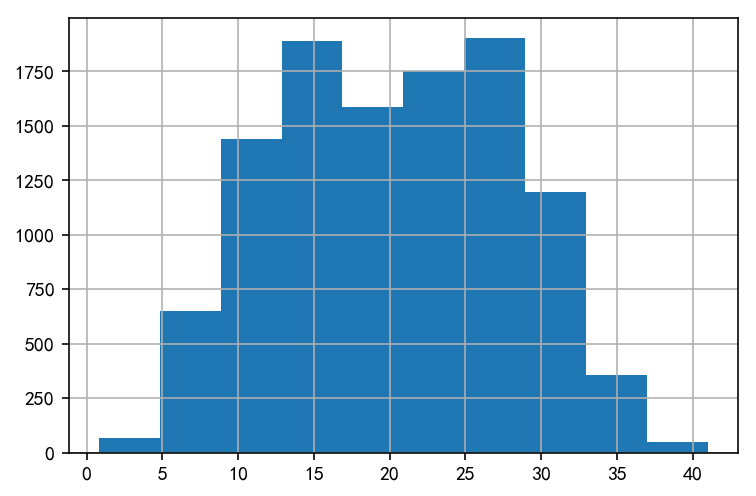

In [82]:
df_clean['temp'].hist()
plt.show()

In [88]:
fea_cols = [
    'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity',
    'windspeed', 'hour', 'week', 'year'
]

In [91]:
corr_matt = df_clean[fea_cols].corr()
corr_matt

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,week,year
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,-0.006546,-0.010553,-0.004797
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,-0.000354,-0.191832,0.012021
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,0.002780,-0.704267,-0.002482
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.022740,-0.047692,-0.012548
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.145430,-0.038466,0.061226
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.140343,-0.040235,0.058540
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.278011,-0.026507,-0.078606
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.146631,-0.024804,-0.015221
hour,-0.006546,-0.000354,0.002780,-0.022740,0.145430,0.140343,-0.278011,0.146631,1.000000,-0.002925,-0.004234
week,-0.010553,-0.191832,-0.704267,-0.047692,-0.038466,-0.040235,-0.026507,-0.024804,-0.002925,1.000000,-0.003785


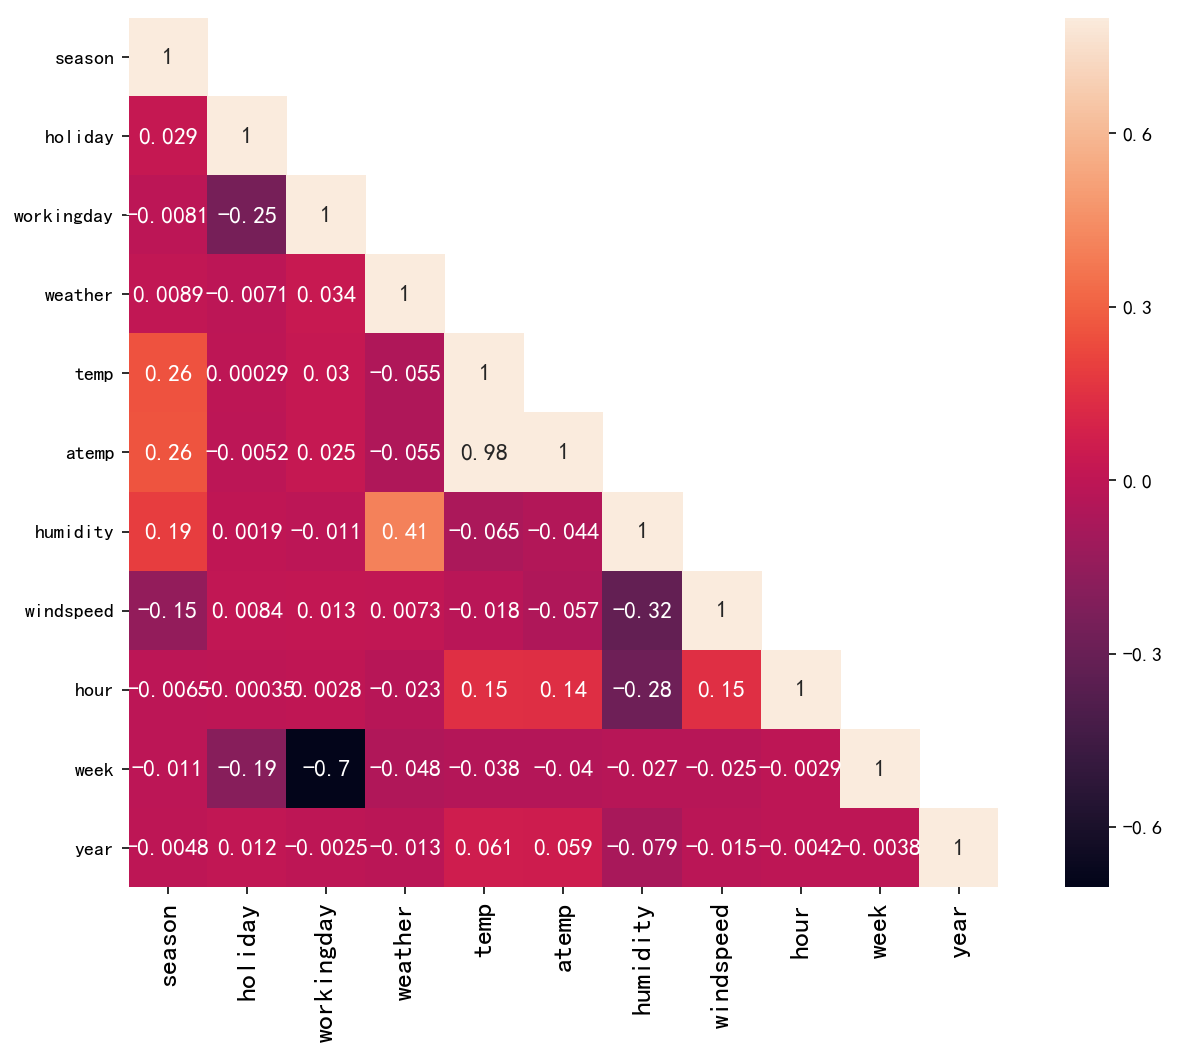

In [96]:
import seaborn as sns

mask = np.array(corr_matt)
mask[np.tril_indices_from(corr_matt)] = False

fig, ax = plt.subplots()
fig.set_size_inches(12, 8)

sns.heatmap(
    corr_matt,
    mask=mask,
    vmax=.8,
    square=True,
    annot=True,
    annot_kws={
        'fontsize': 12
    })
plt.xticks(fontsize=14)
plt.yticks(fontsize=10)

plt.show()

## 使用随机森林查看特征重要度

In [101]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(
    n_estimators=1000, min_samples_split=11, oob_score=True)
rfr.fit(df_clean[fea_cols].values, df_clean['log_cas'].values)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [106]:
rfr.feature_importances_

array([0.01213996, 0.00071441, 0.04464126, 0.01534398, 0.20882448,
       0.04987436, 0.03787262, 0.01375714, 0.57865646, 0.02654573,
       0.01162962])

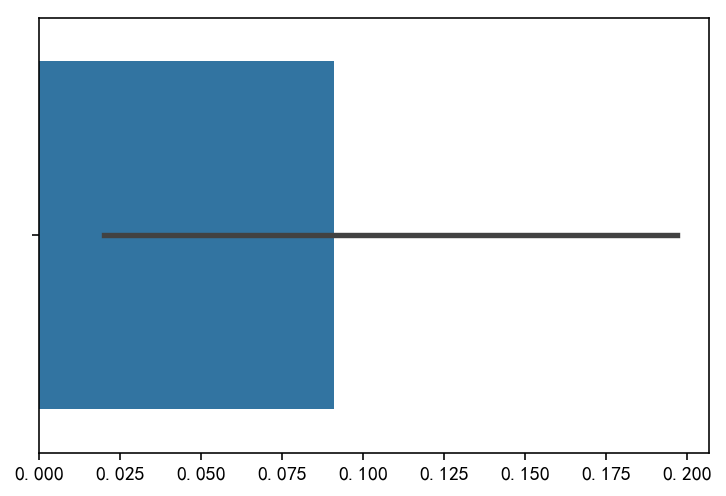

In [111]:
sns.barplot()

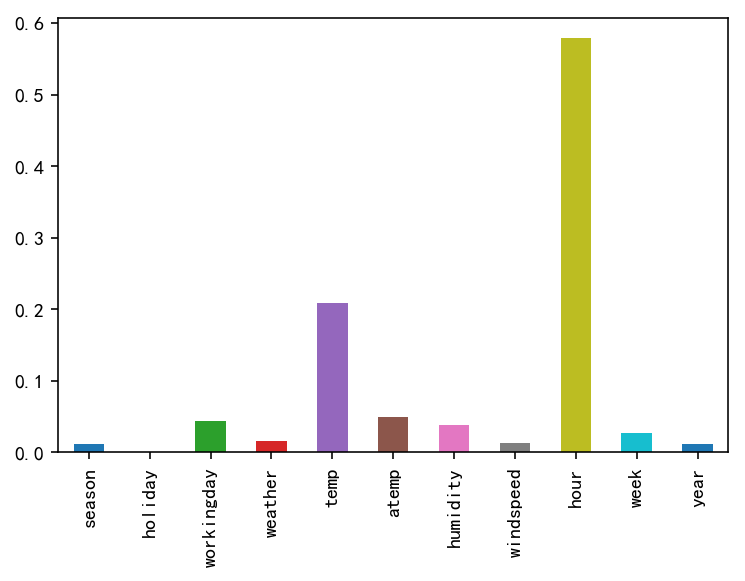

In [112]:
pd.Series(rfr.feature_importances_, index=fea_cols).plot(kind='bar')
plt.show()

In [105]:
rfr.oob_score_

0.8928453868254268

In [113]:
fea_cas = [
    'season', 'workingday', 'weather', 'temp', 'humidity', 'windspeed', 'hour',
    'week', 'year'
]

In [114]:
rfr.fit(df_clean[fea_cas].values, df_clean['log_cas'].values)
pd.DataFrame(rfr.feature_importances_).plot(kind='bar')
rfr.oob_score_

NameError: name 'clf_cal' is not defined

0.952913263631424

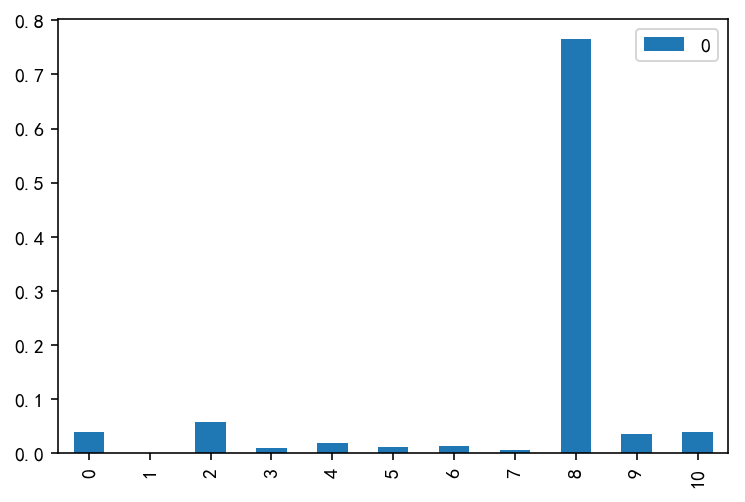

In [115]:
clf_reg = RandomForestRegressor(n_estimators=1000, min_samples_split=11, oob_score=True)
clf_reg.fit(df_clean[fea_cols].values, df_clean['log_reg'].values)
pd.DataFrame(clf_reg.feature_importances_).plot(kind='bar')
clf_reg.oob_score_

In [ ]:
clf_reg.feature_importances_

In [ ]:
fea_regs=['season', 'workingday', 'weather', 'temp', 'humidity', 'hour', 'week', 'year']

In [ ]:
clf_reg.fit(df_clean[fea_regs].values, df_clean['log_reg'].values)
pd.DataFrame(clf_reg.feature_importances_).plot(kind='bar')
clf_reg.oob_score_

In [ ]:
y_pred7 = exp(clf_cal.predict(df_clean_test[fea_cas])) + exp(clf_reg.predict(df_clean_test[fea_regs])) - 2
y_pred7[:40]